<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [46]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [25]:
# Answer:
rows = movies.shape[0]
columns = movies.shape[1]
print ('Number of rows are',rows, 'and number of columns are',columns) 


Number of rows are 979 and number of columns are 6


#### Check the data type of each column.

In [26]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [27]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [28]:
# Answer:
movies.loc[:,'duration'].sort_values()


389     64
338     66
258     67
293     68
88      68
742     69
351     70
938     75
405     75
303     76
713     78
864     78
489     78
535     79
513     80
853     80
533     80
283     80
297     80
622     80
117     81
541     81
738     81
789     81
330     81
595     82
306     82
174     83
759     83
766     83
      ... 
361    181
166    182
109    183
245    184
132    186
611    187
318    188
184    188
89     189
316    189
40     189
671    191
220    191
424    193
620    194
8      195
385    197
335    197
2      200
7      201
630    202
767    205
17     207
204    212
85     216
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

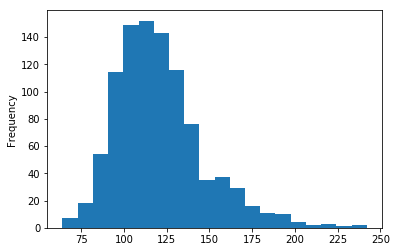

In [10]:
# Answer:
ax = movies.loc[:, 'duration'].plot(kind='hist', bins=20);

#### Use a box plot to display that same data.

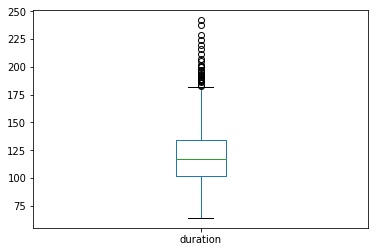

In [11]:
# Answer:
ax = movies.loc[:, 'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [29]:
# Answer:
movies.loc[:,'content_rating'].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

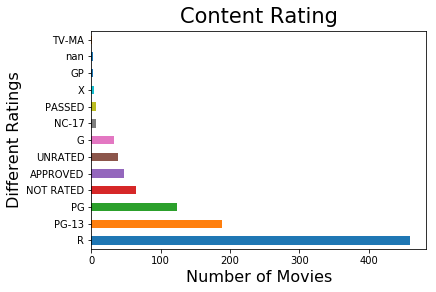

In [30]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts(dropna=False).plot(kind='barh')
ax.set_title('Content Rating', fontsize=21, y=1.01)
ax.set_ylabel('Different Ratings', fontsize=16);
ax.set_xlabel('Number of Movies', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [31]:
# Answer:
a = movies.loc[:,'content_rating'].replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'})
a.head(40)

0           R
1           R
2           R
3       PG-13
4           R
5     UNRATED
6     UNRATED
7       PG-13
8           R
9           R
10      PG-13
11      PG-13
12         PG
13      PG-13
14      PG-13
15      PG-13
16          R
17    UNRATED
18          R
19         PG
20          R
21          R
22    UNRATED
23          R
24          R
25      PG-13
26      PG-13
27          R
28          R
29    UNRATED
30         PG
31          R
32         PG
33          R
34          R
35          G
36          R
37         PG
38    UNRATED
39          R
Name: content_rating, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [32]:
# Answer:
movies.loc[:,'content_rating'].replace({'X':'NC-17', 'TV-MA':'NC-17'})

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [47]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [55]:
# Answer:
movies.loc[:,'content_rating'].fillna('UNRATED', inplace=True)
movies.isnull().sum()



star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [56]:
# Answer:
two_plus = movies.loc[movies.loc[:,'duration'] >= 120,'star_rating'].mean()
two_minus = movies.loc[movies.loc[:,'duration'] < 120,'star_rating'].mean()
print ('Average star rating for movies 2hours or longer is',two_plus, 'and for movies shorter than 2 hours',two_minus) 

Average star rating for movies 2hours or longer is 7.948898678414082 and for movies shorter than 2 hours 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

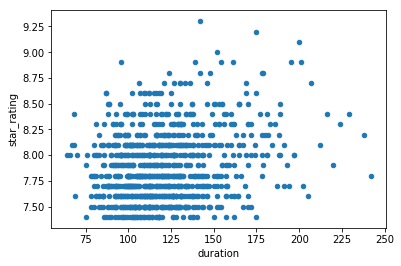

In [57]:
# Answer:
movies.loc[:,['duration','star_rating']].plot(kind='scatter', x='duration', y='star_rating');


#### Calculate the average duration for each genre.

In [58]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

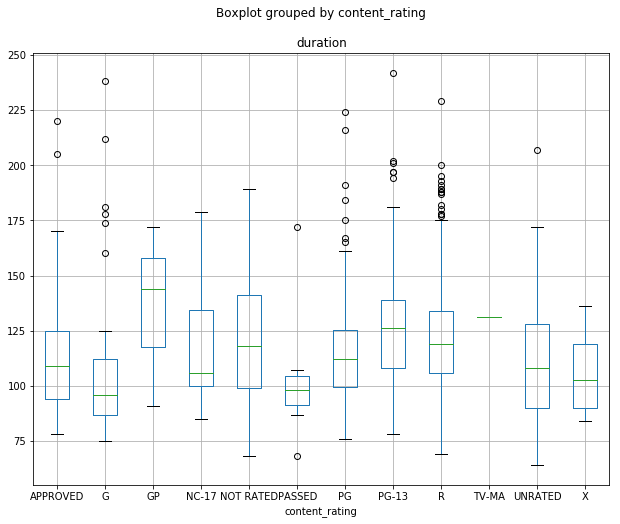

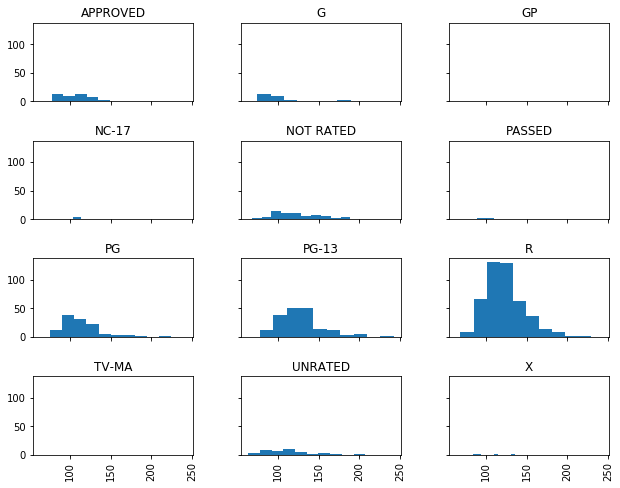

In [62]:
# Answer:
movies.boxplot(column='duration', by='content_rating', figsize=(10, 8))
ax = movies.hist(column='duration', by='content_rating', sharex=True, sharey=True, figsize=(10, 8));


#### Determine the top rated movie (by star rating) for each genre.

In [63]:
# Answer:
#movies.loc[movies.groupby('genre')['star_rating'].max(), ['title','genre']]
#movies.loc[movies.loc[:,['star_rating','title']].groupby('genre')
#a = movies.loc[movies.loc[:,['star_rating','title','genre']].sort_values(by='star_rating', ascending=False, inplace=True),:]
movies.loc[movies.groupby('genre')['star_rating'].idxmax(),['genre','title','star_rating']]

,genre,title,star_rating
3,Action,The Dark Knight,9.0
7,Adventure,The Lord of the Rings: The Return of the King,8.9
30,Animation,Spirited Away,8.6
8,Biography,Schindler's List,8.9
25,Comedy,Life Is Beautiful,8.6
0,Crime,The Shawshank Redemption,9.3
5,Drama,12 Angry Men,8.9
468,Family,E.T. the Extra-Terrestrial,7.9
638,Fantasy,The City of Lost Children,7.7
105,Film-Noir,The Third Man,8.3


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [64]:
# Answer:
movies.loc[:,'title'].value_counts()


Les Miserables                                    2
Dracula                                           2
The Girl with the Dragon Tattoo                   2
True Grit                                         2
Man on Fire                                       1
The Hurt Locker                                   1
Keith                                             1
Lawrence of Arabia                                1
Repulsion                                         1
Planet of the Apes                                1
Sympathy for Mr. Vengeance                        1
Mary Poppins                                      1
The Thing                                         1
Cabaret                                           1
The Dirty Dozen                                   1
The Orphanage                                     1
Army of Darkness                                  1
American Gangster                                 1
Into the Wild                                     1
Despicable M

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [68]:
# Answer:
movies.loc[:,'genre'].value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies.loc[movies.loc[:,'genre'].isin(top_genres), :].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [73]:
# Answer:
genre_counts = movies.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies.loc[movies.loc[:,'genre'].isin(top_genres), :].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [74]:
# Answer:
movies.groupby('genre')['star_rating'].mean()[movies.loc[:,'genre'].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [75]:
# Answer:
ratings = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
ratings[ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!